/Applications/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
/Applications/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
/Applications/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
/Applications/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
/App

-0.533655029219 0.442777277579
-0.66904485595 0.435960455331


/Applications/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):
/Applications/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


-0.356898043702 0.191130872575


/Applications/anaconda/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


-0.215682486289 0.0967903662724


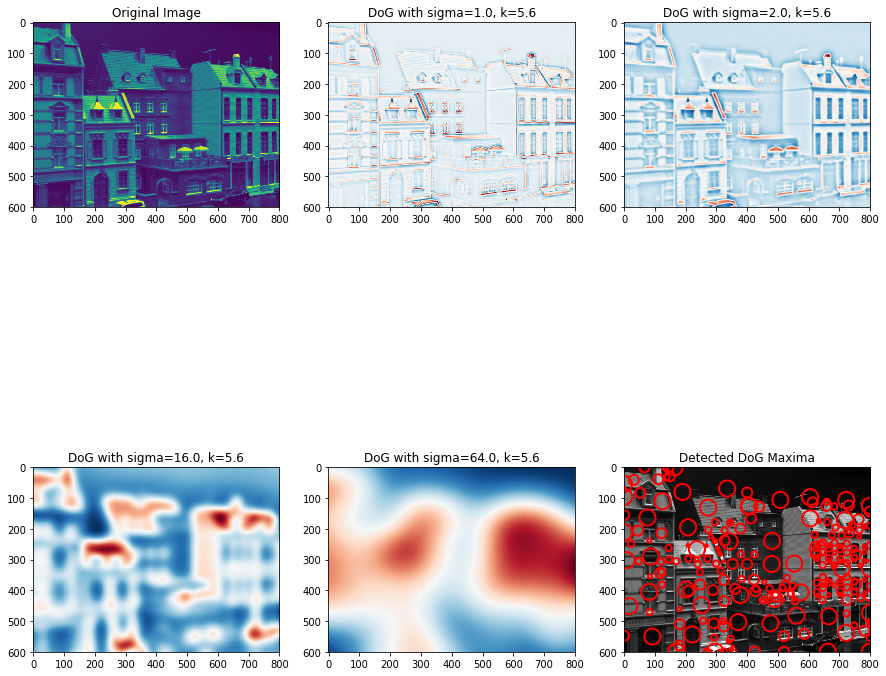

In [22]:
# https://gist.github.com/leonidk/8798fdbf38db120b8536d25ea2f8c3b4

import skimage
from skimage import data, feature, color, img_as_float, filters, io
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (15.0, 15.0)


# original_image = img_as_float(data.chelsea())
original_image = img_as_float(io.imread('Img001_diffuse_smallgray.png'))
# img = color.rgb2gray(original_image)
img = original_image

k = 5.6

plt.subplot(2,3,1)
plt.imshow(original_image)
plt.title('Original Image')

for idx,sigma in enumerate([1.0,2.0,16.0,64.0]):
	s1 = filters.gaussian_filter(img,k*sigma)
	s2 = filters.gaussian_filter(img,sigma)

	# multiply by sigma to get scale invariance
	dog = s1 - s2
	plt.subplot(2,3,idx+2)
	print (dog.min(),dog.max())
	plt.imshow(dog,cmap='RdBu')
	plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

ax = plt.subplot(2,3,6)
blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_dog(img, min_sigma=4, max_sigma=32,threshold=0.5,overlap=1.0)]
# skimage has a bug in my version where only maxima were returned by the above
blobs_dog += [(x[0],x[1],x[2]) for x in feature.blob_dog(-img, min_sigma=4, max_sigma=32,threshold=0.5,overlap=1.0)]

#remove duplicates
blobs_dog = set(blobs_dog)

img_blobs = color.gray2rgb(img)
for blob in blobs_dog:
	y, x, r = blob
	c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
	ax.add_patch(c)
plt.imshow(img_blobs)
plt.title('Detected DoG Maxima')

plt.show()